In [3]:
#Input layer - CNN / Dense Layer/ Convoluted Layer 
# i. ReLU layer
# ii. Pooling layer
#   i. batch Normalization
#   ii. Dropout layer
#   iii. Upsampling

# 2. Hidden layer - NN
# 3. Output layer - FCNN

In [2]:
# 1. Tensor Flow
# 2. Pytorch
# 3. MaxNet

In [4]:
# this sectionm is for model
import tensorflow as tf

# this section for algebraic analysis
import numpy as np

# This section for vizualization
import matplotlib.pyplot as plt


import warnings
warning.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
# this sectionm is for model
import tensorflow as tf

In [21]:
class NeuralNetwork:
    
    def _init_(self,layers):
          self.layers=layers
          self.L=len(layers)  
            
          self.number_feature=layers[0]
          self.number_class=layers[-1]
          
        # creating weight an dbias
          self.W={}
          self.b={}
    
          self.dw={}
          self.db={}
    
          self.setup()
          
    def setup(self):
        for i in range(1,self.L):
            self.W[i]=tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1])))
            self.b[i]=tf.Variable(tf.random.normal(shape=(self.layers[i],1)))

In [ ]:
# 1. dtype="float32"
# 2. dtype=np.float32
# 3. dtype=tf.float32
# 4. dtype=torch.float32

In [27]:
class NeuralNetwork(NeuralNetwork):
    
    def forwardpass(self,A):
        A=tf.convert_to_tensor(A,dtype=float32)
        for i in range(1,self.L):
            Z=tf.matmul(A,tf.transpose(self.W[i]))+tf.transpose(self.b[i]) 
            if i!=self.L-1:
                A=tf.nn.relu(Z)
            else:
                A=Z
        return A            

In [30]:
# We will us ethis section for computing loss function and Upgrading the previous parameters
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self, A,Y):  
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y,A))
    
    def upgrade_parameters():   
      for j in range(1,self.L):
        self.W[j].assing_sub(lr*self.dw[j])
        self.b[j].assing_sub(lr*self.db[j])

In [50]:
class NeuralNetwork(NeuralNetwork):
   def predict(self,x):
    A=self.forwardPass(x)
    return tf.argmax(tf.nn.softmax(A),axis=1)

   def info(self):
    num_params=0
    for i in range(1,self.L):
        num_params+=self.W[i].shape[0]*self.W[i].shape[1]
        num_params+=self.b[i].shape[0]
            
        print("Number of Feature:{}".format(self.number_feature))
        print("Total number of class is:{}".format(self.number_class))
        
        print("Hidden Layer information is:{}".format())
        for j in range(1,self.L-1):
            print("layer:{},Units {}".format(j,self.layers[j]))
        print("Total Number of parameters: {}".format(num_params))    

In [85]:
# training on batch
class NeuralNetwork(NeuralNetwork):
    
    def training_on_batch(self,x,y,lr):
        x=tf.convert_to_tensor(x,dtype=tf.float32)
        y=tf.convert_to_tensor(y,dtype=tf.float32)
        
        with tf.GradientTape(presistent=True) as tape:
            A=self.fporwardPass(x)
            loss=self.compute_loss(A,y)
            
            for key in self.W.keys():
                self.dw[key]=tape.gradient(loss,self.W[key])
                self.db[key]=tape.gradient(loss, self.b[key])
            
            del tape
            
            self.upgrade_parameters(lr)
            
            return loss.numpy()

In [54]:
#Training Start
class NeuralNetwork(NeuralNetwork):
    def train(self,x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size,lr):
        history={"val_loss":[],
                 "train_loss":[],
                "val_acc":[]}
        
        for e in range(0,epochs):
            training_loss_epochs=0.0
            print("Epochs {}".format(e),end="|")
            for i in range(step_per_epochs):
                x_batch=x_train[i*batch_size:(i+1)*batch_szie]
                y_batch=y_train[i*batch_size:(i+1)*batch_szie]
                batch_loss=self.training_loss_on_batch(x_batch,y_batch,lr)
                epochs_loss_train+=batch_loss
                
                if i %int(step_per_epochs/10)==0:
                    print(end=".")
                    
            history['train_loss'].append(epochs_loss_train/step_per_epochs) 
         
        valA=self.forwardPass(x_test)
        history['val_acc'].append(self.compute_loss(y_test, valA).numpy())
        
        valuePr=self.predict(x_test)
        history['val_acc'].append(np.mean(np.argmax(y_test,axis=1)==valuePr.numpy()))
        print("Value Accuracy: ",history['val_acc'][-1])
        
        return history   

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def loadDatasets():
    (x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
    x_train=np.reshape(x_train,(x_train.shape[0],784))/255.0
    y_train=tf.keras.utils.to_categorical(y_train)
    x_test=np.reshape(x_test,(x_test.shape[0],784))/255.0
    y_test=tf.keras.utils.to_categorical(y_test)
    
    print("X Train Datasets Shape:{}".format(x_train.shape))
    print("Y test Data {}".format(y_test))
    
    return (x_train,y_train),(x_test,y_test)

def plot_random_sample(x,y,p=None):
    indices=np.random.choice(range(0,x.shape[0]),10)
    y=np.argmax(y,axis=1)
    
    if p is None:
        p=y
        
    plt.figure(figsize=(10,4))    
    for i, index in enumerate(indices):
        plt.subplot(2,5,i+1)
        plt.imshow(x[index].reshape(28,28),cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.gray()
        
        
        if y[index]==p[index]:
            col='g'
        else:
            col='r'
        plt.xlabel(str(p[index]),color=col)
        
    return plt 

In [94]:
(x_train,y_train),(x_test,y_test)=loadDatasets()

X Train Datasets Shape:(60000, 784)
Y test Data [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


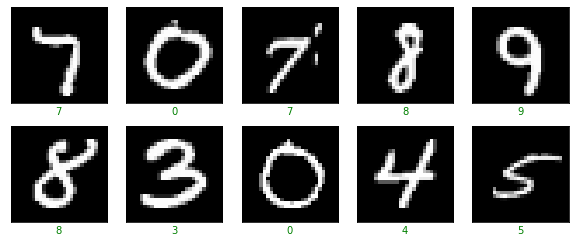

In [99]:
plot_random_sample(x_train,y_train).show()